## Week 3 - Linear Regression - Workshop Solution


This week we will use the theory about linear regression that we have learned last and this week. We will look at polynomial regression using the least squares solution derived before. Here, we will also see interesting findings about model-selection and see the over and under-fitting problem directly in our data set.

Please read over the whole notebook. It contains excercises too that you have to complete.

Section-A: Linear regression with one variable
In this task, you will learn how to manually perform linear regression on some random training data using gradient descent to find optimal parameters. Step 1: Setup libraries and data Step 2: Visualise data Step 3: Create functions for linear equation, its derivatives, and cost fucntion Step 4: Initialise variables Step 5: Perform gradient descent to update variables Step 6: Check model fitness/prediction

Section-B: Polynomial regression using Scikit-Learn library
In this task, you will learn how to use the Scikit-Learn library to perform polynomial regression. This includes using PolynomialFeatures function to create additional features from your data and using these features to fit Scikit-Learn's LinearRegression model. Step 1: Setup libraries and data Step 2: Create polynomial features from data Step 3: Create polynomial regression model Step 4: Fit model to data Step 5: Check model fitness

Section-C: Polynomial regression with multiple features
In this task, you will learn how to use multiple features to fit a polynomial regression model and how to calcuate the model's performance using RMSE. Step 1. Setup libraries and data Step 2. Create polynomial features from data Step 3. Create polynomial regression model and fit the model to data Step 4. Check model fitness

Excercise:

Section-D: Evaluate multiple models by changeing the Polynomial regression and observe effect of over-fitting and under-fitting

In this task, you will learn how to fit multiple polynomial regression model and how to evaluate different model's performance using RMSE.

Section-E: Plot a graph to show the model perfomance by varying polynomial degress as done in the above task. On horizontal axis you will have degree of polynomial and on the vertical axis you will have RMSE. You are required to plot RMSE result values for both training and testing datasets

Section-F. Exercise Do all the steps mentioned in section E and F for the dataset provided. Do the analysis and see that, while the training error decreases with a larger degree of the polynomial, the test set error significantly increases (which is the one we are interested in). This is a typical behavior we get for overfitting. We can make the following conclusions:

In order to fit the data well, we have to find the right model complexity Over-fitting: The model-complexity is too high. We fit the noise and not the data Under-fitting: The model-complexity is too low. We can not represent the data well enough. For choosing the optimal model, we always have to consider the error on an independent test set not on the training set On the training set, the error can be arbitrarily good. This is only an indication that the algorithm has learned the example by heart, not that it can generalize to new samples.


---



### A. Linear regression with one variable








> Step 1: Setup libraries and data


In [1]:
import numpy as np
import matplotlib.pyplot as plt


epsilon = 0.00001 # Represents the error threshold value. If the error between predicted and actual values fall below this threshold, we will stop the gradient descent.
alpha = 0.001     # This is the learning rate parameter.


x_train = np.random.randn(100) # Randomly create a set of 100 values that will be used as training data
y_train = x_train*10 + np.random.randn(100)*10 # Create ground truth data that is some relation with training data.



> Step 2: Visualise data


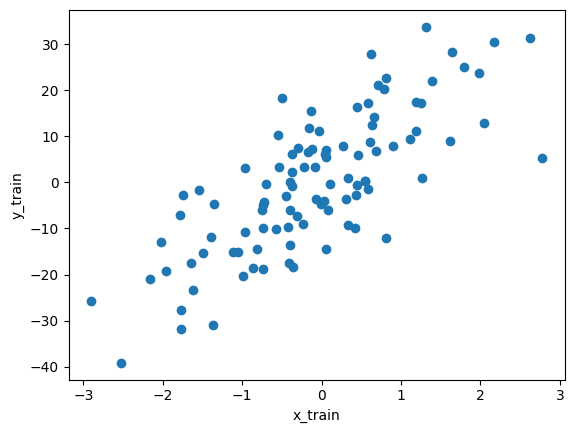

In [2]:
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

> Step 3: Create functions for linear equation, its derivatives, and cost fucntion


In [3]:
# Our linear equation of the form y = mx + c. We want to fit this equation on the training data to find values of m and c that best estimates the relation between x and y
def f(m, c):
  return m*x_train + c  

# Cost function that finds the mean squared error between the predicted values (y_pred) and the actual values (y_train)
def cost_func(y_pred):
  return (1/len(x_train)) * (np.sum(y_train - y_pred)**2)

# The derivative of y=mx + c with respect to variable m
def derivative_m(y_pred):
  return (-2/len(x_train)) * np.sum(x_train*(y_train - y_pred))

# The derivative of y=mx + c with respect to variable c
def derivative_c(y_pred):
  return (-2/len(x_train)) * np.sum(y_train - y_pred)


> Step 4: Initialise variables


In [4]:
m = np.random.randn()
c = np.random.randn()


> Step 5: Perform gradient descent to update variables


In [5]:
error = 1000 # intially set a large error value so the while condition is true and gradient descent starts

while (error > epsilon):
  y_pred = f(m, c) #find the prediction using the variables m and c
  error = cost_func(y_pred) #error between prediction and actual values

  m = m - alpha * derivative_m(y_pred) # update variable m
  c = c - alpha * derivative_c(y_pred) # update variable c
  
print("y_pred=",y_pred)
print("error = ", error)
print("m {}".format(m))
print("c {}".format(c))

y_pred= [  3.17828951   1.15309573   4.76372322  12.46721501  -5.35753435
   5.65216803  13.07353548   5.93960114  -0.27512863  -2.94459652
   6.61754899   4.74665416 -11.11358586  -3.57866187 -13.46661973
  -2.42804325  -2.52662093  -3.11291592  -7.70372917 -16.51781479
   3.78163639 -17.03305328   6.1453306    3.51808411   0.47960214
   6.46771267   8.00838898   8.72833725   7.99712109   5.9382686
  -1.10915459  -4.08810006  -7.88854971  -1.91104977 -21.45487318
  19.95855003   0.08293478 -13.67777106  15.04206268   1.31443061
  16.67596313 -11.4883256   -2.41462672  -5.6629395   11.31165129
  -0.61277031  -5.6413294    1.54292096  -5.85174109   4.81709025
 -11.25080317 -14.83111629  11.82167624  -5.73189883 -14.97686124
   0.80452164  -2.66113326  -2.71815125   3.80004911 -18.26960389
   7.14335503  -5.74423761  -2.81233604  -8.98686766   6.89593639
   4.62137932 -12.76525004  -4.21840278  -2.68849569  -1.8167136
  -1.2004648    4.53365234  10.7034896    1.28313608  -8.49389666
  25

> Step 6: Check model fitness/prediction

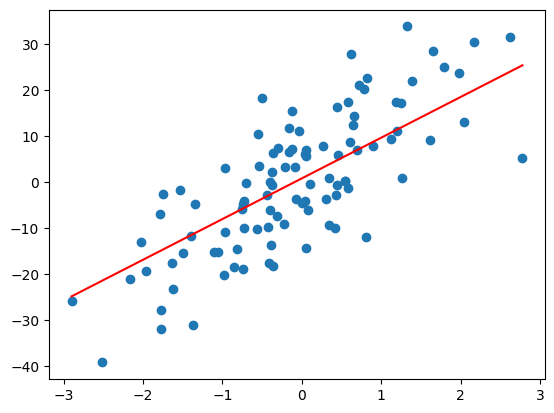

In [6]:
y_pred = f(m, c) # find the prediction using optimal m and c variables

plt.scatter(x_train, y_train) 
plt.plot([min(x_train), max(x_train)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

### B. Polynomial regression using Scikit-Learn library

> Step 1: Setup libraries and data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


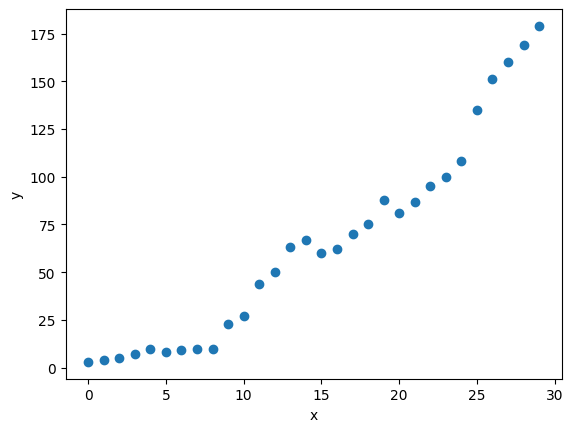

In [8]:
x = np.arange(0, 30) # create a data series
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.scatter(x, y)
plt.xlabel('x'),plt.ylabel('y')
plt.show()

> Step 2: Create polynomial features from data



In [9]:
#PolynomialFeatures function us used to generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
poly = PolynomialFeatures(degree=2, include_bias=False) # "degree" sets the degree of our polynomial function. 
                                                        # "degree=2" means that we want to work with a 2nd degree polynomial of the form y = ax^2 + bx + c
                                                        # "include_bias=False" means that we do not want to create a bias column to use with polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model). It will be included later when creating linear regression model.
poly_features = poly.fit_transform(x.reshape(-1, 1))  # fit_transform function converts our data x into the polynomial
                                                      # reshape(-1,1) transforms our numpy array x from a 1D array to a 2D array

In [10]:
poly_features # check what features are created. The first column is the x column and the 2nd column is the x^2 column

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 25., 625.],
       [ 26., 676.],
       [ 27., 729.],
       [ 28., 784.],
       [ 29., 841.]])

> Step 3: Create polynomial regression model




In [11]:
#LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
poly_reg_model = LinearRegression(fit_intercept=True) # "fit_intercept=True" is used to calculate the intercept for the regression model.


> Step 4: Fit model to data


In [12]:
poly_reg_model.fit(poly_features, y)

LinearRegression()

> Step 5: Check model fitness

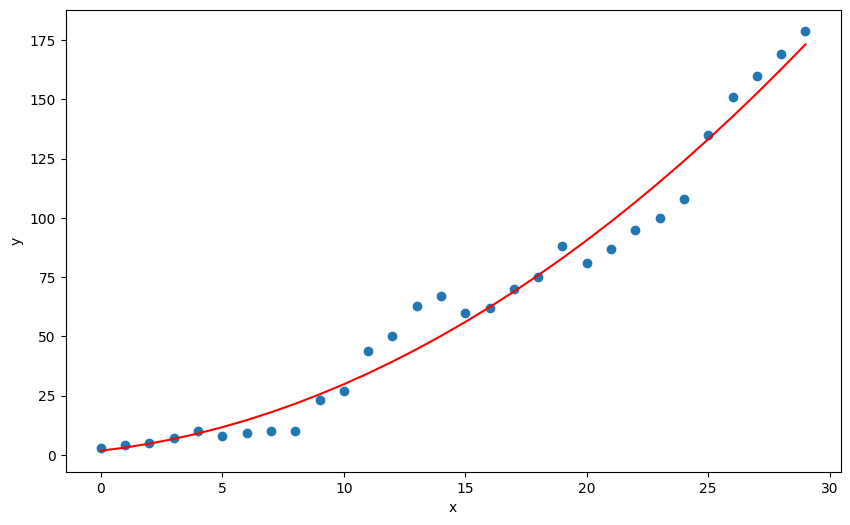

In [13]:
y_predicted = poly_reg_model.predict(poly_features) # find the prediction using the fitted model

#plot the original data and the predicte
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### C. Polynomial regression with multiple features

> Step 1. Setup libraries and data



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [15]:
np.random.seed(1) #to control randomness and produce similar results on different runs
x_1 = np.absolute(np.random.randn(100,1) * 10) # Randomly create feature x_1
x_2 = np.absolute(np.random.randn(100,1) * 30) # Randomly create feature x_2
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100,1)*20   # Create ground truth data that has some relation with training data.

In [16]:
X = np.hstack((x_1,x_2)) # Horizontaly stack the two features x_1 and x_2 to create a single 2D array of features
X.shape

(100, 2)

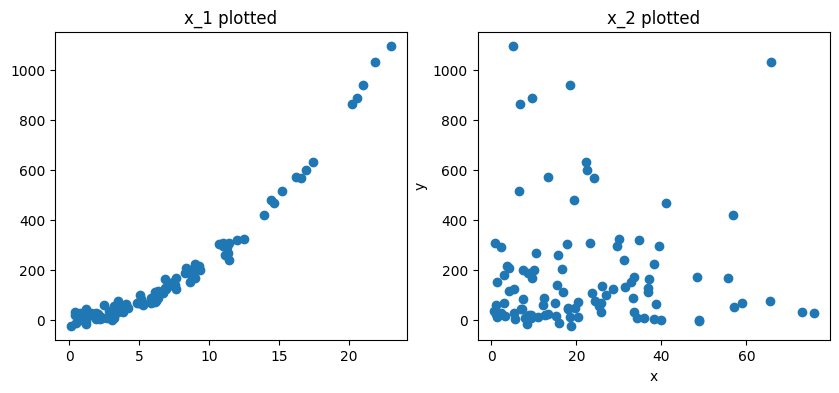

In [17]:
# visualise the created features.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(X[:,0], y)
axes[1].scatter(X[:,1], y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

> Step 2. Create polynomial features from data



In [18]:
from sklearn.model_selection import train_test_split

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

poly_features.shape #check the shape of features. Note that there are 5 columns in the array but we set degree=2 in our PolynomialFeatures function.
                    # since there are 2 features x_1 and x_2, the PolynomialFeatures function creates features for 5-term function of the form: y = ax_1^2 + bx_2^2 + cx_1 + dx_2 + ex_1*x_2


(100, 5)

In [19]:
# Split the data into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

> Step 3. Create polynomial regression model and fit the model to data



In [20]:
poly_reg_model = LinearRegression(fit_intercept=True)
poly_reg_model.fit(X_train, y_train)

LinearRegression()

> Step 4. Check model fitness

In [21]:
#compute the RMSE between the predicted and original values

poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print("RMSE (X_test): ", poly_reg_rmse)

#compare with RMSE on training data
poly_reg_y_predicted = poly_reg_model.predict(X_train)
poly_reg_rmse = np.sqrt(mean_squared_error(y_train, poly_reg_y_predicted))
print("RMSE (X_train): ", poly_reg_rmse)

RMSE (X_test):  20.937707839078772
RMSE (X_train):  17.779670265643755


### D. Repeat above steps with different degrees of polynomials to find best degree




In [22]:
train_rmse_list = []
test_rmse_list = []
degree_list = []
for degree in range(5):
  degree+=1 # to start with degree=1
  
  print("checking for polynomial degree: ", degree)
  degree_list.append(degree)
  
  #create PolynomialFeatures of different degree at each loop
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  poly_features = poly.fit_transform(X)
  print("shape of polynomial features: ", poly_features.shape)
  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

  #create and fit model
  poly_reg_model = LinearRegression(fit_intercept=True)
  poly_reg_model.fit(X_train, y_train)

  #check RMSE on train data
  poly_reg_y_predicted = poly_reg_model.predict(X_train)
  poly_reg_rmse = np.sqrt(mean_squared_error(y_train, poly_reg_y_predicted))
  print("RMSE (X_train): ", poly_reg_rmse)
  train_rmse_list.append(poly_reg_rmse)
  
  #check RMSE on test data
  poly_reg_y_predicted = poly_reg_model.predict(X_test)
  poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
  print("RMSE (X_test): ", poly_reg_rmse)
  test_rmse_list.append(poly_reg_rmse)

  print("-------------------------\n\n")

checking for polynomial degree:  1
shape of polynomial features:  (100, 2)
RMSE (X_train):  73.94166591426736
RMSE (X_test):  62.30248745387854
-------------------------


checking for polynomial degree:  2
shape of polynomial features:  (100, 5)
RMSE (X_train):  17.779670265643755
RMSE (X_test):  20.937707839078772
-------------------------


checking for polynomial degree:  3
shape of polynomial features:  (100, 9)
RMSE (X_train):  17.292349912441882
RMSE (X_test):  21.641118304045012
-------------------------


checking for polynomial degree:  4
shape of polynomial features:  (100, 14)
RMSE (X_train):  15.33950492627214
RMSE (X_test):  31.860684859124518
-------------------------


checking for polynomial degree:  5
shape of polynomial features:  (100, 20)
RMSE (X_train):  14.914899389862066
RMSE (X_test):  35.627286603700554
-------------------------




# E. Exercise
Plot a graph to show the model perfomance by varying polynomial degress as done in the above task. On horizontal axis you will have degree of polynomial and on the vertical axis you will have RMSE. You are required to plot RMSE result values for both training and testing datasets

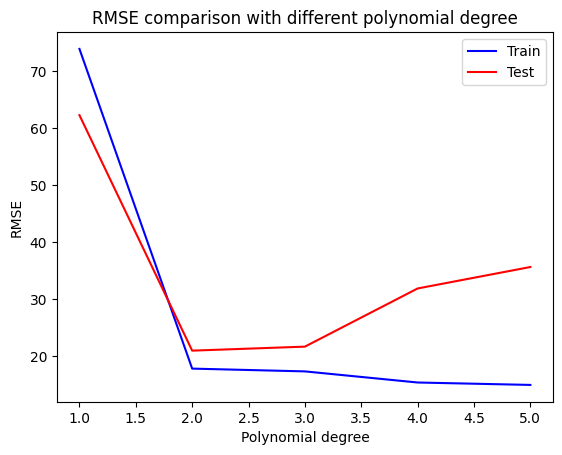

In [23]:
plt.plot(degree_list, train_rmse_list,c='blue')
plt.plot(degree_list, test_rmse_list,c='red')
plt.legend(['Train','Test'])
plt.title("RMSE comparison with different polynomial degree")
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE')
plt.show()

# F. Exercise
Do all the steps mentioned in section E and F for the dataset provided. Do the analysis and see that, while the training error decreases with a larger degree of the polynomial, the test set error significantly increases (which is the one we are interested in). This is a typical behavior we get for overfitting. We can make the following conclusions:

In order to fit the data well, we have to find the right model complexity Over-fitting: The model-complexity is too high. We fit the noise and not the data Under-fitting: The model-complexity is too low. We can not represent the data well enough. For choosing the optimal model, we always have to consider the error on an independent test set not on the training set On the training set, the error can be arbitrarily good. This is only an indication that the algorithm has learned the example by heart, not that it can generalize to new samples.

In [24]:
# write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot

data_train = pd.read_csv('regression_train.csv')
data_test = pd.read_csv('regression_test.csv')

data_train

,Unnamed: 0,x,y
0,0,0.507979,-2.885948
1,1,2.081478,-8.107921
2,2,-2.090953,-9.628462
3,3,0.108276,3.871277
4,4,3.929470,29.992393
5,5,3.962931,35.265511
6,6,-3.744147,-47.535566
7,7,-2.927571,-21.047461
8,8,-4.485328,-90.654904
9,9,-0.591902,-5.330597


# Get the training data as numpy arrays


In [25]:
x_train = data_train['x']
y_train = data_train['y']

x_test = data_test['x']
y_test = data_test['y']

# Plot the training data 


In [30]:
%matplotlib notebook
## get input output vectors from the data frame and plot the data
import matplotlib.pyplot as plt


plt.clf()
plt.plot(x_train,y_train, 'bo')
plt.plot(x_test,y_test, 'g')
plt.legend(('training points', 'ground truth'))
#plt.hold(True)
plt.savefig('trainingdata.png')
plt.show()
#DOESN'T WORK ATM 

<IPython.core.display.Javascript object>

AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'